In [1]:
# API
import requests
import json

# General
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

### Rainfall and Temperature data from 1959-01-01 to 2022-01-01

In [2]:
# Mango farm in Spain (Finca Los Pepenos)
lat = 36.80
long = -4.19

# Daily weather parameters
daily_params = ["temperature_2m_max", "temperature_2m_min", "precipitation_sum"]

# Timezone
timezone = "auto"

# Forecast period
start_date = "1959-01-01"
end_date = "2022-12-31"

# All params
params = {"latitude": lat, "longitude": long, 
          "daily": daily_params, "timezone": timezone,
          "start_date": start_date, "end_date": end_date}

# Default API url
api_url = "https://archive-api.open-meteo.com/v1/archive"

# API call
response = requests.get(api_url, params = params)

# Load the Data
data_units = response.json()["daily_units"]
data = pd.DataFrame(response.json()["daily"])
data.columns = ["date", "temp_max", "temp_min", "rain"]

# Save .csv
data.to_csv("weather.csv", index = False)

data

,date,temp_max,temp_min,rain
0,1959-01-01,NaN,NaN,NaN
1,1959-01-02,11.7,10.1,10.0
2,1959-01-03,14.2,7.1,0.0
3,1959-01-04,13.9,5.3,0.0
4,1959-01-05,14.9,5.8,0.0
...,...,...,...,...
23371,2022-12-27,18.9,9.7,0.0
23372,2022-12-28,17.7,9.1,0.0
23373,2022-12-29,18.6,8.3,0.0
23374,2022-12-30,18.9,11.8,0.0


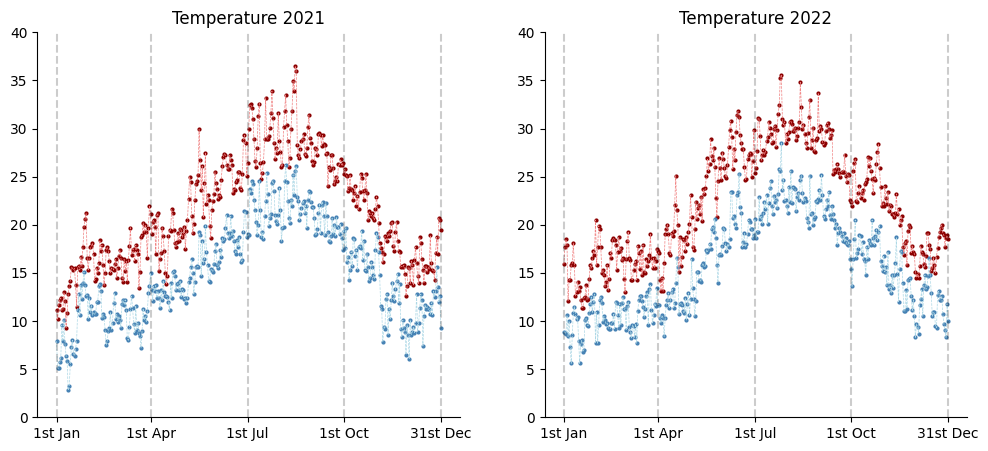

In [26]:
# Extract data for 2021, 2022
df21 = data[-365*2:-365]
df22 = data[-365:]

# Initialize figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

def plotTemp(ax, temp_max, temp_min, year):
    # Ticks
    ticks = [0, 89, 181, 272, 364]
    tick_labels = ["1st Jan", "1st Apr", "1st Jul", "1st Oct", "31st Dec"]

    # Plot
    ax.scatter(range(len(temp_max)), temp_max, s = 4, c = "darkred")
    ax.plot(range(len(temp_max)), temp_max, lw = 0.5, ls = "--", c = "lightcoral")
    
    ax.scatter(range(len(temp_min)), temp_min, s = 4, c = "steelblue")
    ax.plot(range(len(temp_min)), temp_min, lw = 0.5, ls = "--", c = "lightblue")
    
    ax.set_ylim(0, 40)
    ax.set_xticks(ticks, labels = tick_labels)
    for i in ticks:
        ax.axvline(i, c = "black", alpha = 0.2, ls = '--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f"Temperature {year}")
    
# Plot temperature 
plotTemp(ax1, df21.temp_max, df21.temp_min, "2021")
plotTemp(ax2, df22.temp_max, df22.temp_min, "2022")

plt.show()

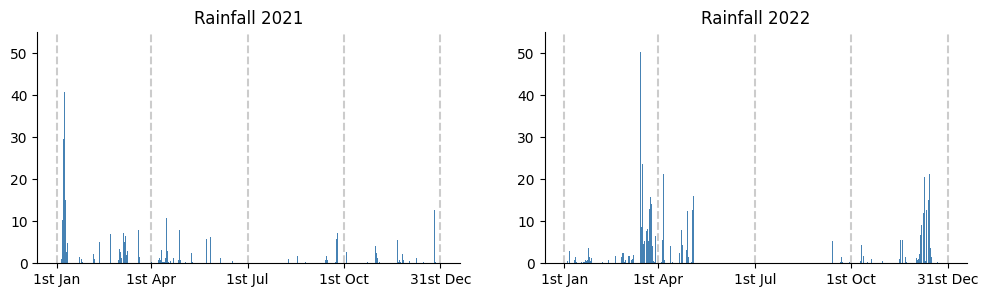

In [45]:
# Initialize figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 3))

def plotRain(ax, rain, year):
    # Ticks
    ticks = [0, 89, 181, 272, 364]
    tick_labels = ["1st Jan", "1st Apr", "1st Jul", "1st Oct", "31st Dec"]

    # Plot
    ax.bar(range(len(rain)), rain, color = "steelblue")
    
    ax.set_ylim(0, 55)
    ax.set_xticks(ticks, labels = tick_labels)
    for i in ticks:
        ax.axvline(i, c = "black", alpha = 0.2, ls = '--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f"Rainfall {year}")

# Plot rain
plotRain(ax1, df21.rain, "2021")
plotRain(ax2, df22.rain, "2022")

plt.show()